# FMRI DATA ANALYSIS - NARPS DATASET TEAM X19V

This notebook reproduce the analysis made by team **X19V** for the NARPS experiment (Botvinik-Nezer & al, 2020). 

**To use this notebook :** 
- Download fMRIprep data available [**here**](https://openneuro.org/datasets/ds001734/versions/1.0.4) or in [**datalad**](http://datasets.datalad.org/?dir=/workshops/nih-2017/ds001734).
- Modify the paths:
    - **exp_dir**: directory where the ds001734-download repository is stored
    - **result_dir**: directory where the intermediate and final repositories will be stored
    - **working_dir**: name of the directory where intermediate results will be stored
    - **output_dir**: name of the directory where final results will be stored

Botvinik-Nezer, R., Holzmeister, F., Camerer, C.F., Dreber, A., Huber, J., Johannesson, M., Kirchler, M., Iwanir, R., Mumford, J.A., ..., Nichols, T.E., Poldrack, R.A., Schonberg, T. (2020). Variability in the analysis of a single neuroimaging dataset by many teams. Nature. https://doi.org/10.1038/s41586-020-2314-9.

In [1]:
from pathlib import Path
from narps_open.pipelines import team_X19V_new

In [2]:
team_ID = "X19V"

DEBUG = True

# Important directories
## root_dir : where the code is stored
root_dir = Path().cwd().parent.parent / "data"

## exp_dir : where the data are stored (where the ds001734 directory is stored)
exp_dir = root_dir / "original" / "ds001734"

## result_dir : where the intermediate and final results will be store
results_dir = root_dir / "derived" / "reproduced"

## output_dir : where the final results will be store
output_dir = f"NARPS-{team_ID}-reproduced"

## working_dir : where the intermediate outputs will be store
working_dir = Path(output_dir) / "intermediate_results"

data_dir = root_dir / "derived" / "original"

## Single subject - Single run analysis

### In/out Nodes + Important values

In [3]:
# subjects to use for this analysis
subject_list = [dirs.stem[-3:] for dirs in exp_dir.iterdir() if dirs.stem[:3] == "sub"]

if DEBUG:
    subject_list = ["001"]

print(f"Found {len(subject_list)} subjects")

Found 1 subjects


In [4]:
contrast_list = ["1", "2", "3", "4"]

In [7]:
pipeline = team_X19V_new.PipelineTeamX19V(bids_dir=exp_dir, subject_list=subject_list)
pipeline.directories.results_dir = results_dir
pipeline.directories.set_output_dir_with_team_id(pipeline.team_id)
pipeline.directories.set_working_dir_with_team_id(pipeline.team_id)

l1_analysis = pipeline.get_subject_level_analysis()

230920-14:29:37,976 nipype.workflow INFO:
	 Generated workflow graph: /home/remi/github/narps_open_pipelines/data/derived/reproduced/NARPS-X19V-reproduced/intermediate_results/l1_analysis/graph.png (graph2use=orig, simple_form=True).


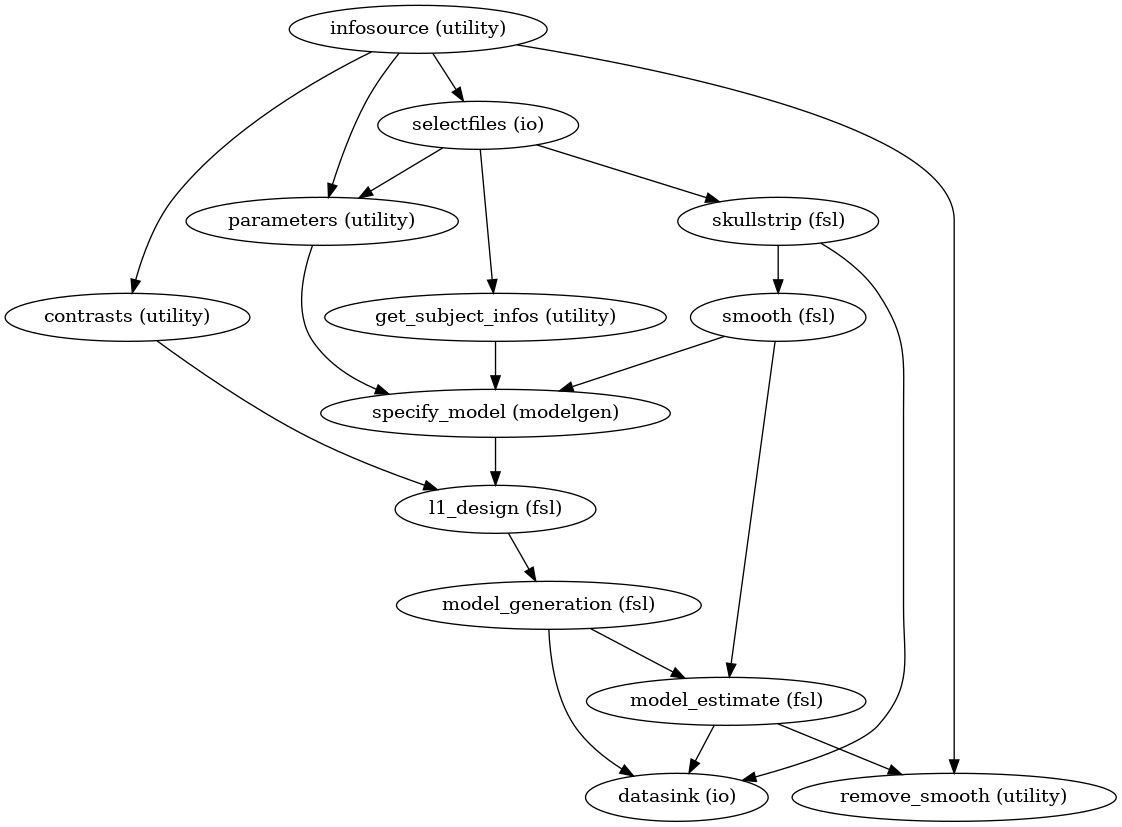

In [11]:
# Visualize graph
from IPython.display import Image

l1_analysis.write_graph(graph2use="orig")
Image(
    filename=pipeline.directories.results_dir
    / working_dir
    / "l1_analysis"
    / "graph.png"
)

In [6]:
l1_analysis.run("MultiProc", plugin_args={"n_procs": 1})

230918-17:17:15,524 nipype.workflow INFO:
	 Workflow l1_analysis settings: ['check', 'execution', 'logging', 'monitoring']


230918-17:17:15,662 nipype.workflow INFO:
	 Running in parallel.
230918-17:17:15,990 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 8 jobs ready. Free memory (GB): 27.87/27.87, Free processors: 1/1.
230918-17:17:16,107 nipype.workflow INFO:
	 [Node] Setting-up "l1_analysis.selectfiles" in "/home/remi/github/narps_open_pipelines/data/derived/reproduced/NARPS-X19V-reproduced/intermediate_results/l1_analysis/_run_id_01_subject_id_001/selectfiles".
230918-17:17:16,131 nipype.workflow INFO:
	 [Node] Executing "selectfiles" <nipype.interfaces.io.SelectFiles>
230918-17:17:16,145 nipype.workflow INFO:
	 [Node] Finished "selectfiles", elapsed time 0.004728s.
230918-17:17:17,990 nipype.workflow INFO:
	 [Job 0] Completed (l1_analysis.selectfiles).
230918-17:17:17,999 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 10 jobs ready. Free memory (GB): 27.87/27.87, Free processors: 1/1.
230918-17:17:18,169 nipype.workflow INFO:
	 [Job 1] Cached (l1_analysis.contrasts).
230918-17:17:1

## Second level analysis - Concatenate runs

In [ ]:
l2_analysis = pipeline.get_l2_analysis()

In [ ]:
l2_analysis.run("MultiProc", plugin_args={"n_procs": 4})

## Third level analysis - Group level 

In [ ]:
n_sub = len(subject_list)

In [ ]:
l3_analysis_equalRange = pipeline.get_group_workflow(
    "equalRange",
)
l3_analysis_equalIndiff = pipeline.get_group_workflow(
    "equalIndifference",
)
l3_analysis_groupComp = pipeline.get_group_workflow(
    "groupComp",
)

In [ ]:
l3_analysis_equalRange.run()

In [ ]:
l3_analysis_equalIndiff.run()

In [ ]:
l3_analysis_groupComp.run("MultiProc", plugin_args={"n_procs": 4})

In [ ]:
pipeline.reorganize_results()